## かめさん講座　機械学習入門
#### 23.多クラスのROCとAUC

In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# データロード
df = sns.load_dataset('iris')
# 学習データとテストデータ
X = df.loc[:, df.columns!='species']
y = df['species']
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression()
model.fit(X_train, y_train)
# 予測（確率）
y_pred_proba = model.predict_proba(X_test)

In [3]:
# one-hotエンコーディング
print(y_test[:5])
print(model.classes_)

from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
y_test_one_hot[:5]

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: object
['setosa' 'versicolor' 'virginica']


array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [4]:
from sklearn.metrics import roc_curve, auc
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

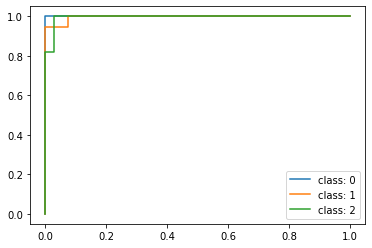

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.legend()

In [6]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
all_fpr

array([0.        , 0.02941176, 0.07407407, 1.        ])

In [10]:
all_x = np.arange(7)
print(all_x)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
print(np.interp(all_x, data_x, data_y))

[0 1 2 3 4 5 6]
[0.         1.         2.         2.66666667 3.33333333 4.
 6.        ]


In [15]:
mean_tpr = np.zeros_like(all_fpr)
print(mean_tpr)
print(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    print(fpr[i])
    print(tpr[i])
    print(np.interp(all_fpr, fpr[i], tpr[i]))
mean_tpr = mean_tpr / len(model.classes_)
mean_tpr

[0. 0. 0. 0.]
[0.         0.02941176 0.07407407 1.        ]
[0. 0. 0. 1.]
[0.     0.0625 1.     1.    ]
[1. 1. 1. 1.]
[0.         0.         0.         0.07407407 0.07407407 1.        ]
[0.         0.05555556 0.94444444 0.94444444 1.         1.        ]
[0.94444444 0.94444444 1.         1.        ]
[0.         0.         0.         0.02941176 0.02941176 1.        ]
[0.         0.09090909 0.81818182 0.81818182 1.         1.        ]
[0.81818182 1.         1.         1.        ]


array([0.92087542, 0.98148148, 1.        , 1.        ])

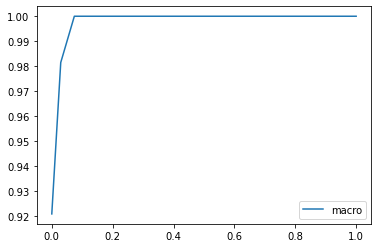

In [17]:
plt.plot(all_fpr, mean_tpr, label='macro')
plt.legend()

In [18]:
auc(all_fpr, mean_tpr)

0.9981505321919265

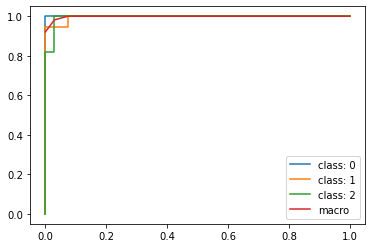

In [19]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()

In [20]:
# microei 平均
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

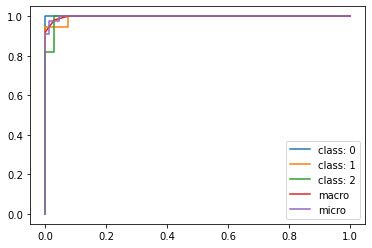

In [21]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.legend()

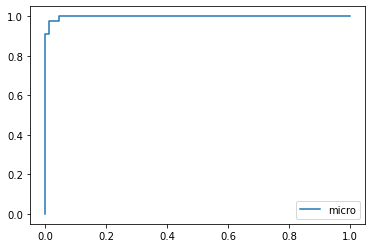

In [22]:
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.legend()

In [23]:
print(auc(fpr['micro'], tpr['micro']))

0.9982716049382716
